In [13]:
import os
import subprocess
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from time import time as t
from numba import jit

import json
# import io

# import datetime

import astropy
import astropy.units as u
import astropy.constants as c

# from IPython.display import Image, display_png

from astroquery.simbad import Simbad

import photontools

from IPython.display import display

import mosfit
import corner
# import json
# import matplotlib.pyplot as plt
# import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
from collections import OrderedDict
from mosfit.plotting import bandcolorf


In [14]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 150

lss = ['-', '--', '-.', ':']

In [15]:
filepath_hewd = "../../hewd_hr/gamtmp.d"
filepath_cowd = "../../cowd/gamtmp.d"

directory_ML = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/WhiteDwarf_Thermonuclear_Transients/"
filepaths_spectra_ML = subprocess.getoutput('find "{}/WD06_spectra/" | grep ".par" | sort'.format(directory_ML)).split("\n")[1:]

vel_cowd = np.array([2.56466437e+03, 1.18143578e+04, -1.41779372e+00]) * 1e5
vel_hewd = np.array([4.49999438e+03, 1.54867843e+04, 1.27477734e+01]) * 1e5
# f_ = open(filepath_, mode="r") 

In [4]:
# bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "U", "B", "V", "R", "I", "J", "H", "K"])
# color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# dict_color = dict(zip(bands_from_blue, color_from_blue))

bands_from_blue = np.array(["g", "r", "i", "z"])
color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
#     color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
dict_color = dict(zip(bands_from_blue, color_from_blue))


In [5]:
filepath_catalog_lc = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/catalog/fast_transients/2014ApJ...794...23D/table2.dat"
filepath_catalog_head = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/catalog/fast_transients/2014ApJ...794...23D/table1.dat"


In [6]:
columns_ = ["category", "name", "yaer", "month", "day", "ra_h", "ra_min", "ra_s", 
            "dec_deg", "dec_arcmin", "dec_arcsec", 
            "z", "distance", 
            "lambdag", "lambdar", "lambdai", "lambdaz", "Eb_v"]
df_catalog_head = pd.read_csv(filepath_catalog_head, delim_whitespace=True, header = None, names=columns_)
df_catalog_head.replace("---", np.nan, inplace=True)
df_catalog_head[columns_[11:]] = df_catalog_head[columns_[11:]].astype(float)
df_catalog_head = df_catalog_head[[st in ["A", "B"] for st in df_catalog_head["category"]]]


In [7]:
names_ = ["name", "Filter", "MJD", "Phase", "mag_upper", "mag", "emag", "Instrument"]
df_lc = pd.read_csv(filepath_catalog_lc, delim_whitespace=True, header = None, names=names_)
df_lc["mag_upper"].replace("<", True, inplace=True)
df_lc["mag_upper"].replace(np.nan, False, inplace=True)
df_lc

,name,Filter,MJD,Phase,mag_upper,mag,emag,Instrument
0,PS1-10ah,g_P1,55248.5,-2.7,False,22.18,0.22,PS1
1,PS1-10ah,g_P1,55230.5,-19.5,True,22.38,NaN,PS1
2,PS1-10ah,g_P1,55233.5,-16.7,True,22.60,NaN,PS1
3,PS1-10ah,g_P1,55236.6,-13.8,True,22.40,NaN,PS1
4,PS1-10ah,g_P1,55239.5,-11.1,True,22.75,NaN,PS1
5,PS1-10ah,g_P1,55242.5,-8.3,True,22.70,NaN,PS1
6,PS1-10ah,g_P1,55251.4,0.0,False,19.95,0.05,PS1
7,PS1-10ah,g_P1,55266.5,14.1,False,21.64,0.17,PS1
8,PS1-10ah,g_P1,55281.3,27.8,True,22.02,NaN,PS1
9,PS1-10ah,g_P1,55293.4,39.1,True,22.26,NaN,PS1


In [8]:
class Transient(object):
    def __init__(self):
        self.name = None
        self.instrument = None
        self.Nphoton = None
        self.redshift = None
        self.luminosity_distance = None
        self.Eb_v = None
        self.maxdate = None
        self.bands = None
        self.data = None # flux/mag with the same order as self.bands [N_band][N_time, 3] 3: time, flux/mag, error of flux/mag
        self.spectra = None # just for stock json data

In [9]:
def calc_model_lc(spectra, transient, filter):
    spectra_ = copy.deepcopy(spectra)
    spectra_ = spectra_.redshift(z=transient.redshift)
    spectra_ = spectra_.dust_extinction(Eb_v = transient.Eb_v, model="maeda")
    lc = photontools.calc_band_flux(spectra_, filter)
    if (u.get_physical_type((transient.luminosity_distance * u.m / u.m).unit) == "length"):
        lc = lc.convert_flux_to_magnitude(filter, system="AB", distance=transient.luminosity_distance)
    elif (u.get_physical_type((transient.luminosity_distance * u.m / u.m).unit) == "dimensionless"):
        lc = lc.convert_flux_to_magnitude(filter, system="AB", distance=transient.luminosity_distance * u.Mpc)
    else:
        raise ValueError("Input luminosity_distnace unit is wrong!")
    return lc

In [10]:
def plot_panstarrs(fig, ax, name, df_header, df_lc):
    
    def get_information_from_df_header(name, df_header):
        df_this = df_header[df_header["name"] == name].iloc[0]
        transient = Transient()
        transient.name = name
        transient.redshift = df_this["z"]
        transient.luminosity_distance = df_this["distance"] # Mpc
        transient.Eb_v = df_this["Eb_v"]
        transient.bands = np.array(["g", "r", "i", "z"])
        transient.data = [[]] * transient.bands.size
        
        return transient

    def get_light_curve_from_df_lc(name, transient, df_lc):
#         transient.bands
        df_this = df_lc[df_lc["name"] == name].sort_values("MJD")
        for i, band in enumerate(transient.bands):
            df_band = df_this[[df_this.loc[j, "Filter"][0] == band for j in df_this.index]]
            transient.data[i] = df_band[["MJD", "Phase", "mag_upper", "mag", "emag"]]
            
        return transient
    
    transient = get_information_from_df_header(name, df_header)
    transient = get_light_curve_from_df_lc(name, transient, df_lc)
    
    for i, band in enumerate(transient.bands):
        # detection
        df_ = transient.data[i][~transient.data[i]["mag_upper"]]
        ax.errorbar(df_["Phase"], df_["mag"], df_["emag"], fmt="--o", color=dict_color[band], label=band)
#         upper limit
        df_ = transient.data[i][transient.data[i]["mag_upper"]]
        ax.errorbar(df_["Phase"], df_["mag"], fmt="v", color=dict_color[band], label="")
        
    return transient, fig, ax

def plot_model(fig, ax, lc, time_shift = 0., **keys):
    for i, theta in enumerate(lc.thetas):
        for j, phi in enumerate(lc.phis):
            for k, band in enumerate(lc.bands):
                if band != "y":
                    ax.plot((lc.times - time_shift) * lc.Doppler_shift_intrinsic[i,j], lc.data[:,i,j,k], color=dict_color[band], **keys)
    return fig, ax

In [11]:
filter_ps = photontools.read_one_instrument_filters("./photontools/filter_data/panstarrs/")

In [12]:
%time spectra_hewd = photontools.read_Maeda_data(filepath_hewd)
%time spectra_cowd = photontools.read_Maeda_data(filepath_cowd)

CPU times: user 8.52 s, sys: 15.6 s, total: 24.1 s
Wall time: 1min 2s
CPU times: user 6.27 s, sys: 12 s, total: 18.3 s
Wall time: 38.4 s


# preprocess spectra

In [16]:
%time spectra_hewd = spectra_hewd.binning(N_theta_bins=10, N_phi_bins=10)
%time spectra_cowd = spectra_cowd.binning(N_theta_bins=10, N_phi_bins=10)
%time spectra_hewd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_hewd)
%time spectra_cowd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_cowd)


CPU times: user 5.15 s, sys: 4.95 s, total: 10.1 s
Wall time: 14.3 s
CPU times: user 3.96 s, sys: 3.79 s, total: 7.75 s
Wall time: 10 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 1.31 s, sys: 294 ms, total: 1.6 s
Wall time: 1.75 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 1.46 s, sys: 119 ms, total: 1.58 s
Wall time: 1.78 s


In [17]:
plt.rcParams["figure.dpi"] = 250


In [18]:
def plot_model(fig, ax, lc, time_shift = 0., **keys):
    for i, theta in enumerate(lc.thetas):
        for j, phi in enumerate(lc.phis):
            for k, band in enumerate(lc.bands):
                if band != "y":
                    ax.plot((lc.times - time_shift) * lc.Doppler_shift_intrinsic[i,j], lc.data[:,i,j,k], color=dict_color[band], **keys)
    return fig, ax

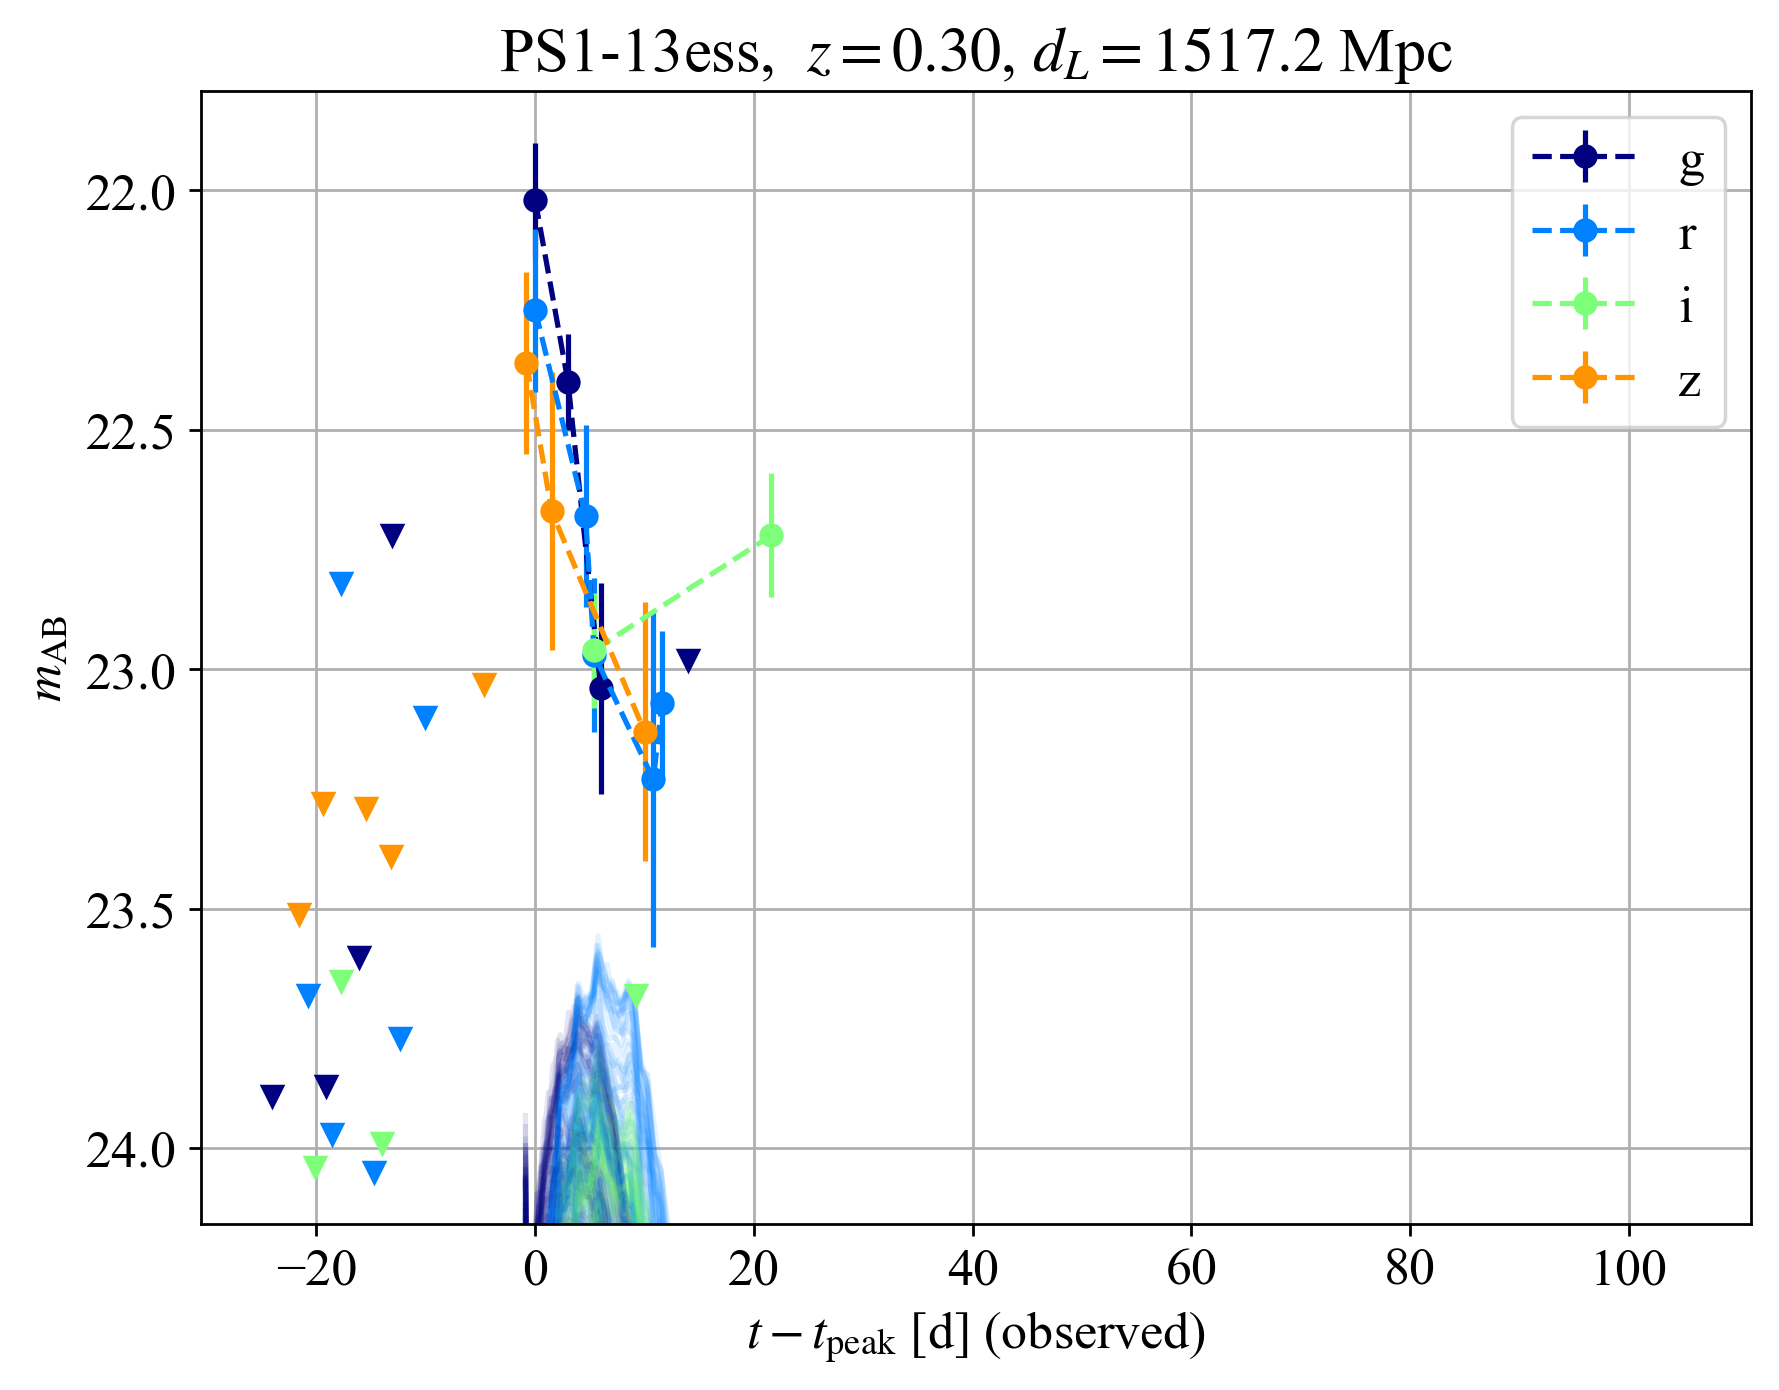

In [19]:
ckeys = {"alpha": 0.1}
tname = "PS1-13ess"
# for i, tname in enumerate(df_catalog_head["name"][9]):
#     print(i, tname)
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
# ax.errorbar(np.arange(3), np.arange(1,4), yerr = np.append([np.nan], np.linspace(0.2, 0.4, 2)), fmt="v")
transient, fig, ax = plot_panstarrs(fig, ax, tname, df_catalog_head, df_lc)
ymin, ymax= ax.get_ylim()


lc = calc_model_lc(spectra_hewd, transient, filter_ps)
fig, ax = plot_model(fig, ax, lc, time_shift=3, **ckeys)

plt.ylim(ymin, ymax)
# plt.title("{:}".format(transient.name))
plt.title(r"{:},  $z = {:.2f}$, $d_L = {:.1f}$ Mpc".format(transient.name, transient.redshift, transient.luminosity_distance))
plt.xlabel(r"$t - t_{\rm{peak}}$ [d] (observed)")
plt.ylabel(r"$m_{\rm{AB}}$")
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
# plt.tight_layout()
# plt.savefig("figs/obs/{}.png".format(tname))
# plt.close()

# open supernovae

In [20]:
__, filter_john, filter_ps, __, __ = photontools.read_all_filters()

./photontools/filter_data/focas
./photontools/filter_data/johnson
./photontools/filter_data/panstarrs
./photontools/filter_data/swift
./photontools/filter_data/twomass


In [107]:
dir_ca_rich = "../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/"

# fpaths_ca_rich = subprocess.getoutput('find {} -name "*.json" | sort'.format(dir_ca_rich)).split("\n")
# golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", PTF11bij", "PTF11kmb", "PTF12bho"])
golden_samples = np.array(["SN2005E", "SN2007ke", "SN2010et", "SN2012hn", "SN2016hgs", "PTF09dav", "PTF11bij", "PTF11kmb"])
fpaths_ca_rich = [[]] * len(golden_samples)
for i, name_ in enumerate(golden_samples):
    fpaths_ca_rich[i] = dir_ca_rich + name_ + ".json"
fpaths_ca_rich = np.array(fpaths_ca_rich)

# json_ = pd.read_json(fpaths_ca_rich[0])

In [108]:
def read_one_json(fpath):
    with open(fpath) as f:
        transient = Transient()
        json_dict = json.load(f)
        transient.name = list(json_dict.keys())[0]
        transient.Eb_v = np.float(json_dict[transient.name]["ebv"][0]["value"])
        transient.maxdate = astropy.time.Time(json_dict[transient.name]["maxdate"][0]["value"].replace("/", "-")).mjd

        if (json_dict[transient.name]["lumdist"][0]["u_value"] == "Mpc"):
            transient.luminosity_distance = np.float(json_dict[transient.name]["lumdist"][0]["value"]) * u.Mpc
        else:
            raise ValueError ("lumdist units {} is not supported yet!".format(json_dict[transient.name]["lumdist"]["u_value"]))
        transient.redshift = np.float(json_dict[transient.name]["redshift"][0]["value"])

        transient.spectra = json_dict[transient.name]["spectra"]

        lc = pd.DataFrame(json_dict[transient.name]["photometry"])
        lc["band"].replace(np.nan, "blank", inplace=True)
        transient.bands = np.sort([np.unicode(b) for b in np.unique(lc["band"])])
        transient.data = [[]] * transient.bands.size
        for i, band in enumerate(transient.bands):
            transient.data[i] = lc[lc["band"] == band]
            transient.data[i] = transient.data[i].sort_values("time")
            transient.data[i] = transient.data[i].reset_index(drop=True)
        transient.Nphoton = len(json_dict[transient.name]["photometry"])
        return transient

def read_all_json(dpath):
    fpaths = subprocess.getoutput('find {} -name "*.json" | sort').split("\n")
    transients = [[]] * len(fpaths)
    for i, fpath in enumerate(fpaths):
        transients[i] = read_one_json(fpath)
    
    return transients




In [109]:
def plot_model2(fig, ax, lc_model, transient, time_shift = 0., use_mosfit_color=False, **keys):
    
    def find_bands_duplicated(lc_model, transient):
        """Todo: modify not only [0] but e.g. Swift band"""
        bands_all = pd.Series(np.append([band[0] for band in lc_model.bands], 
                                        [band.replace("'", "") for band in transient.bands]))
        return bands_all[bands_all.duplicated()].to_numpy()
    
    bands_duplicated = find_bands_duplicated(lc_model, transient)
    print(bands_duplicated)
    
    for i, theta in enumerate(lc_model.thetas):
        for j, phi in enumerate(lc_model.phis):
            for k, band in enumerate(lc_model.bands):
                band = band[0]
                if band in bands_duplicated:
                    if not (use_mosfit_color):
                        ax.plot(transient.maxdate - time_shift + (lc_model.times) * lc_model.Doppler_shift_intrinsic[i,j], lc_model.data[:,i,j,k], color=dict_color[band], **keys)
                    else:
                        ax.plot(transient.maxdate - time_shift + (lc_model.times) * lc_model.Doppler_shift_intrinsic[i,j], lc_model.data[:,i,j,k], color=bandcolorf(band), **keys)
    return fig, ax


In [110]:
def plot_one_astrocats(fig, ax, fpath_json, use_mosfit_color=False, dict_color=None):

#     sns.reset_orig()
    with open(fpath, 'r', encoding = 'utf-8') as f:
        data = json.loads(f.read())
        if 'name' not in data:
            data = data[list(data.keys())[0]]

    photo = data['photometry']

    real_data = len([x for x in photo if 'band' in x and 'magnitude' in x and (
        'realization' not in x or 'simulated' in x)]) > 0

    band_attr = ['band', 'instrument', 'telescope', 'system', 'bandset']
    band_list = list(set([tuple(x.get(y, '')
                                for y in band_attr) for x in photo
                                if 'band' in x and 'magnitude' in x]))
    real_band_list = list(set([tuple(x.get(y, '')
                                     for y in band_attr) for x in photo
                                     if 'band' in x and 'magnitude' in x and (
                                         'realization' not in x or 'simulated' in x)]))
    xray_instrument_attr = ['instrument', 'telescope']
    xray_instrument_list = list(set([tuple(x.get(y, '')
                                for y in xray_instrument_attr) for x in photo
                                if 'instrument' in x and 'countrate' in x])) 
    real_band_list = list(set([tuple(x.get(y, '')
                                     for y in band_attr) for x in photo
                                     if 'band' in x and 'magnitude' in x and (
                                         'realization' not in x or 'simulated' in x)]))
    real_xray_instrument_list = list(set([tuple(x.get(y, '')
                                     for y in xray_instrument_attr) for x in photo
                                     if 'instrument' in x and 'countrate' in x and (
                                         'realization' not in x or 'simulated' in x)]))

    # Uncomment line below to only plot from the specified instruments.
    # inst_exclusive_list = ['UVOT']

#     fig = plt.figure(figsize=(12,8))
#     ax.invert_yaxis()
    # ax.set_xlim(55700,55820)
    # ax.set_ylim(bottom=25, top=19)
    ax.set_xlabel('MJD')
    ax.set_ylabel('Apparent Magnitude')
    used_bands = []
    for full_band in tqdm_notebook(band_list, desc='Photo', leave=False):
        (band, inst, tele, syst, bset) = full_band
        try:
            inst_exclusive_list
        except:
            pass
        else:
            if inst not in inst_exclusive_list:
                continue
        extra_nice = ', '.join(list(filter(None, OrderedDict.fromkeys((inst, syst, bset)).keys())))
#         nice_name = band + ((' [' + extra_nice + ']') if extra_nice else '')
        nice_name = band

    #     realizations = [[] for x in range(len(model['realizations']))]
        for ph in photo:
            rn = ph.get('realization', None)
            si = ph.get('simulated', False)
            if rn and not si:
                if tuple(ph.get(y, '') for y in band_attr) == full_band:
                    realizations[int(rn) - 1].append((
                        float(ph['time']), float(ph['magnitude']), [
                            float(ph.get('e_lower_magnitude', ph.get('e_magnitude', 0.0))),
                            float(ph.get('e_upper_magnitude', ph.get('e_magnitude', 0.0)))],
                    ph.get('upperlimit')))
    #     numrz = np.sum([1 for x in realizations if len(x)])
    #     for rz in realizations:
    #         if not len(rz):
    #             continue
    #         xs, ys, vs, us = zip(*rz)
    #         label = '' if full_band in used_bands or full_band in real_band_list else nice_name
    #         if max(vs) == 0.0:
    #             plt.plot(xs, ys, color=bandcolorf(band),
    #                              label=label, linewidth=0.5)
    #         else:
    #             xs = np.array(xs)
    #             ymi = np.array(ys) - np.array([np.inf if u else v[0] for v, u in zip(vs, us)])
    #             yma = np.array(ys) + np.array([v[1] for v in vs])
    #             plt.fill_between(xs, ymi, yma, color=bandcolorf(band), edgecolor=None,
    #                              label=label, alpha=1.0/numrz, linewidth=0.0)
    #             plt.plot(xs, ys, color=bandcolorf(band), 
    #                              label=label, alpha=1.0, linewidth=0.5)
    #         if label:
    #             used_bands = list(set(used_bands + [full_band]))
        if real_data:
            for s in range(2):
                if s == 0:
                    cond = False
                    symb = 'o'
                else:
                    cond = True
                    symb = 'v'
                vec = [(float(x['time']), float(x['magnitude']),
                        0.0 if 'upperlimit' in x else float(x.get('e_lower_magnitude', x.get('e_magnitude', 0.0))),
                        float(x.get('e_upper_magnitude', x.get('e_magnitude', 0.0)))) for x in photo
                       if 'magnitude' in x and ('realization' not in x or 'simulated' in x) and
                       'host' not in x and 'includeshost' not in x and
                       x.get('upperlimit', False) == cond and
                       tuple(x.get(y, '') for y in band_attr) == full_band]
                if not len(vec):
                    continue
                xs, ys, yls, yus = zip(*vec)
#                 label = nice_name if full_band not in used_bands else ''
                label = nice_name.replace("'", "") if band not in used_bands else ''
                if(use_mosfit_color):
                    color = bandcolorf(band)
                else:
                    color = dict_color[band.replace("'", "")]
                plt.errorbar(xs, ys, yerr=(yus, yls), color=color, fmt=symb,
                             label=label,
                             markeredgecolor='black', markeredgewidth=1, capsize=1,
                             elinewidth=1.5, capthick=2, zorder=10)
                plt.errorbar(xs, ys, yerr=(yus, yls), color='k', fmt=symb, capsize=2,
                             elinewidth=2.5, capthick=3, zorder=5)
                if label:
                    used_bands = list(set(used_bands + [band]))
#                     used_bands = list(set(used_bands + [full_band]))
#     plt.margins(0.02, 0.1)
#     plt.grid()
#     plt.title(fpath.split("/")[-1][:-5])
#     plt.show()
#     plt.close()
    # fig.savefig('../products/lc.pdf')
    
    

In [111]:
bands_ = np.append([band[0] for band in filter_john.bands], filter_ps.bands)
lambdas_ = np.append(filter_john.effective_wavelength, filter_ps.effective_wavelength)

bands_from_blue = bands_[np.argsort(lambdas_)]
bands_from_blue = bands_from_blue[[1, 2, 3, 4, 5, 6, 7, 8]]
color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# color_from_blue = np.array([plt.cm.nipy_spectral(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
dict_color = dict(zip(bands_from_blue, color_from_blue))
dict_lambdas = dict(zip(bands_from_blue, lambdas_[np.argsort(lambdas_)]))

5


['R' 'g' 'i' 'r']


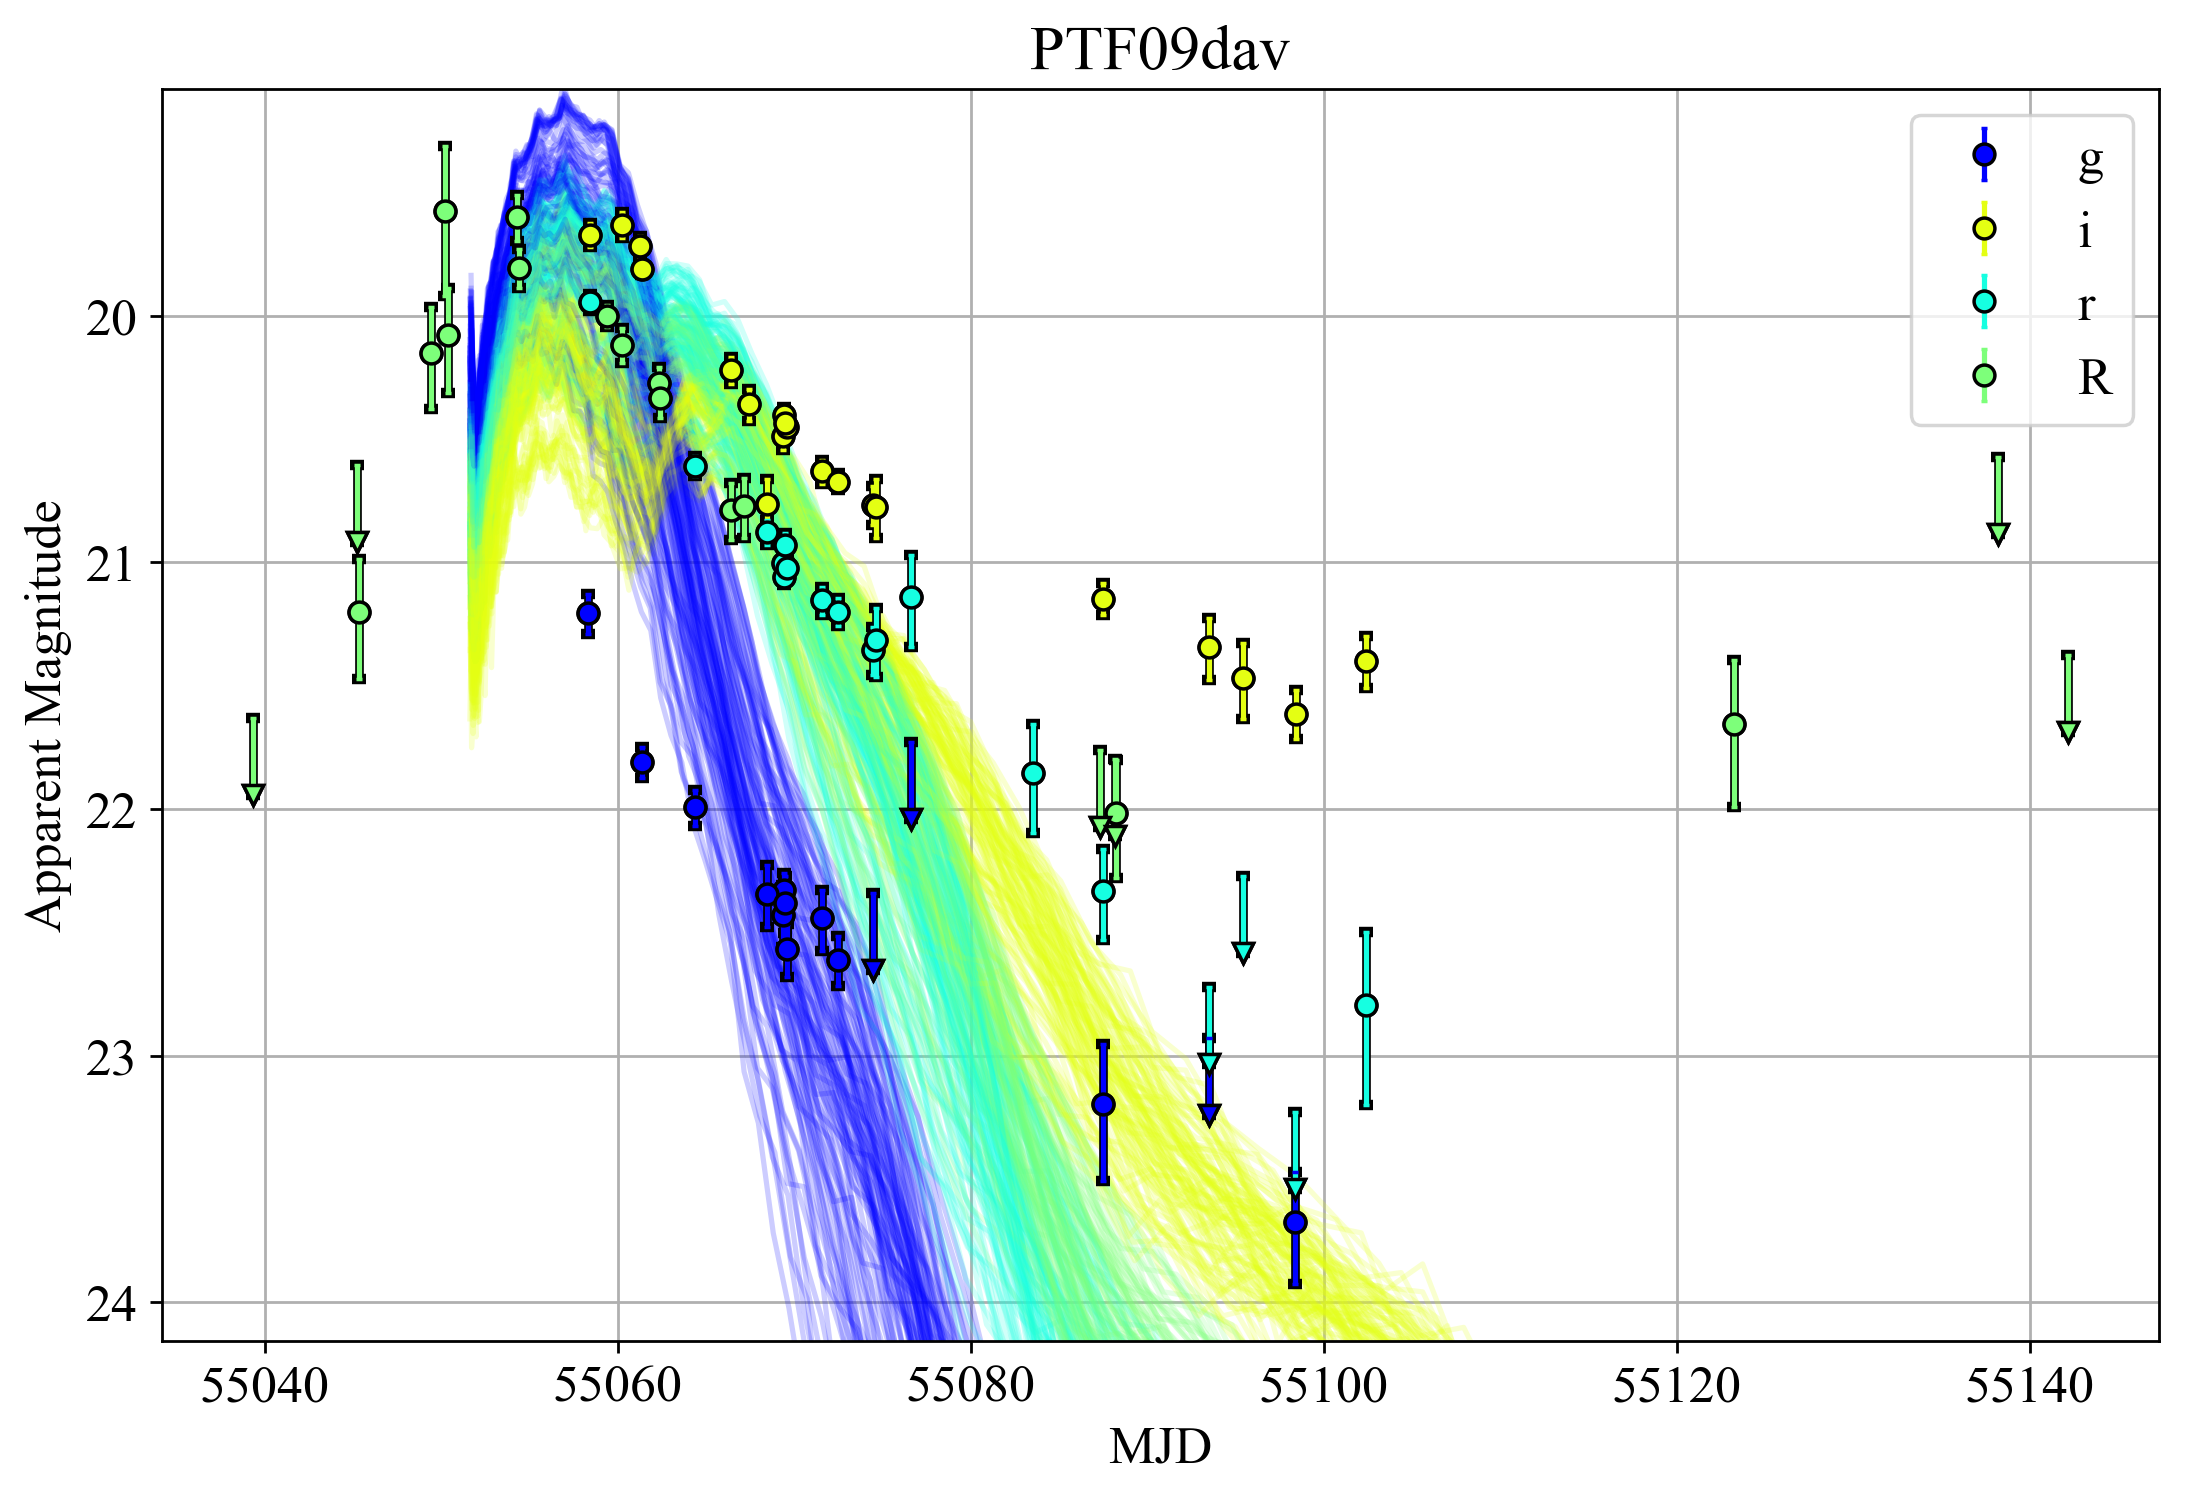

In [113]:
system_="AB"
ckeys = {"alpha": 0.2}
flag_use_mosfit_color = False

for i ,fpath in enumerate(fpaths_ca_rich):
#     if (i != 3):
    if (i == 5):
        print(i)
        tstart = t()

        # read transient json file
        trnasient = read_one_json(fpath)
        lc_johnson = calc_model_lc(spectra_hewd, trnasient, filter_john)
        lc_ps = calc_model_lc(spectra_hewd, trnasient, filter_ps)
        lc_model = lc_johnson.append_band(lc_ps)

        # plotter
        fig = plt.figure(figsize = (9, 6))
        ax = plt.gca()

        plot_one_astrocats(fig, ax, fpath, use_mosfit_color=flag_use_mosfit_color, dict_color=dict_color)
        handles, labels = ax.get_legend_handles_labels()
        sort_index = np.argsort(np.array([dict_lambdas[label] for label in labels]))
        handles_new = [[]] * sort_index.size
        labels_new  = [[]] * sort_index.size
        for j in range(sort_index.size):
            handles_new[j] = handles[sort_index[j]]
            labels_new[j]  = labels[sort_index[j]]
        ax.legend(handles_new, labels_new)
        ax.legend(loc="best")

        xlims = ax.get_xlim()
        ylims = ax.get_ylim()
        
        time_shift = 0.
#         time_shift = 8.
#         xlims = [53384, 53401]
#         xlims = [57680, 57720]
#         ylims = [17.5, 21.5]
        
        plot_model2(fig, ax, lc_model, trnasient, time_shift=time_shift, use_mosfit_color=flag_use_mosfit_color, **ckeys)

        plt.xlim(xlims[0], xlims[1])
        plt.ylim(ylims[0], ylims[1])
        ax.invert_yaxis()
        plt.tight_layout() 
        plt.grid()
        plt.title(trnasient.name)
        
        plt.savefig("figs/obs/ca-rich/{}_tshift_{:.1f}d.png".format(trnasient.name, time_shift))
        plt.show()
        plt.close()


In [73]:
fpaths_ca_rich

array(['../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2005E.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2007ke.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2010et.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2012hn.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/SN2016hgs.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/PTF11kmb.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/PTF11bij.json',
       '../../0002_WD_TDE_radiation_transfer/catalog/Ca-rich_transients/PTF11kmb.json'],
      dtype='<U78')

In [ ]:
band_ = []
for i, fpath in enumerate(fpaths_ca_rich):
    if (i == 2):
        with open(fpath, "r") as f:
            json_ = json.load(f)
            name = list(json_.keys())[0]
            print(i, name)
            phot = pd.DataFrame(json_[name]["photometry"])
    #         print(phot.columns)
            display(phot)
            if ("band" in phot.columns):
                band_ = np.append(band_, np.unique(phot["band"].replace(np.nan, "Blank")))
                display(np.unique(phot["band"].replace(np.nan, "Blank")))
    #             for j, pho in enumerate(phot):
    #                 print("j=", j, pho.keys())

In [204]:
json_['PTF12bho'].keys()[""]

dict_keys(['schema', 'name', 'sources', 'alias', 'dec', 'discoverdate', 'ebv', 'maxappmag', 'maxband', 'maxdate', 'maxvisualappmag', 'maxvisualband', 'maxvisualdate', 'ra', 'photometry'])

In [202]:
band_ = []
for i, fpath in enumerate(fpaths_ca_rich):
    if (i == 8):
        with open(fpath, "r") as f:
            json_ = json.load(f)
            name = list(json_.keys())[0]
            print(i, name)
            phot = pd.DataFrame(json_[name]["photometry"])
    #         print(phot.columns)
            display(phot.iloc[0:1])
            if ("band" in phot.columns):
                band_ = np.append(band_, np.unique(phot["band"].replace(np.nan, "Blank")))
                display(np.unique(phot["band"].replace(np.nan, "Blank")))
    #             for j, pho in enumerate(phot):
    #                 print("j=", j, pho.keys())

8 PTF12bho


,band,e_magnitude,magnitude,source,time,u_time
0,r,0.28,21.02,1,55979.4,MJD


array(['g', 'i', 'r'], dtype=object)

In [ ]:
# class OpenSupernova(Transient):
    
#     def set_color():
#         bands_from_blue = np.array(["g", "r", "R", "i", "z"])
#         color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
#         #     color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
#         dict_color = dict(zip(bands_from_blue, color_from_blue))

    
# #     def plot(self, fig, ax):
# #         dict_color = self.set_color()
# #         for i, band in enumerate(transient.bands):
# #             # detection
# #             df_ = transient.data[i][transient.data[i]["upperlimit"] != True]
# #             ax.errorbar(df_["time"], df_["magnitude"], df_["emag"], fmt="--o", color=dict_color[band], label=band)
# #             # upper limit
# #             df_ = transient.data[i][transient.data[i]["upperlimit"] == True]
# #             ax.errorbar(df_["time"], df_["magnitude"], fmt="v", color=dict_color[band], label="")

# #         ax.set_ylabel("m")
# #         ax.set_xlabel(self.data.iloc[0]["u_time"])
# #         return transient, fig, ax